## https://scikit-learn.org/stable/user_guide.html

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [168]:
df = pd.read_csv("D:/Datasets/housing.csv")

# 1. Veri Keşfi

In [169]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 1.1. Veri seti şemasını, boş değer sayısını görme

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [171]:
# total_bedrooms 20433 içinde boş değerler var.

## 1.2. Histogram

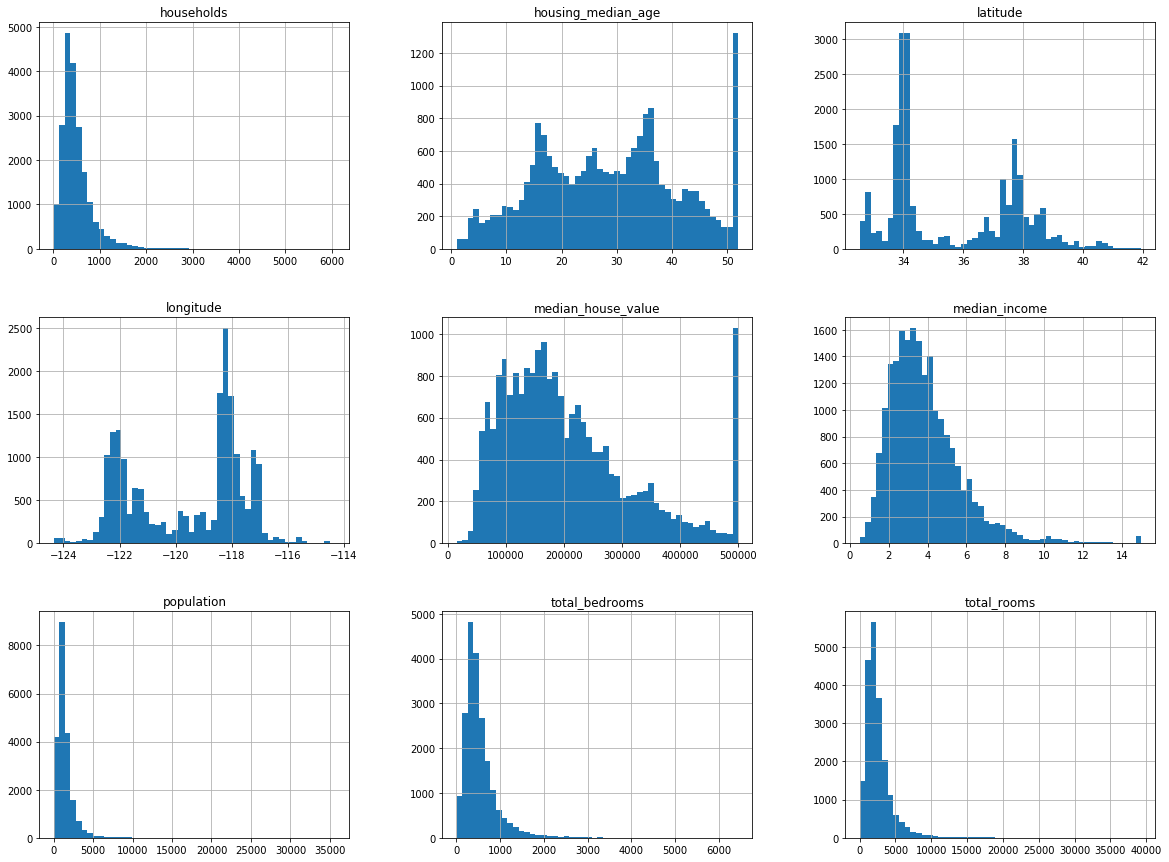

In [172]:
# Sadece nümerik değişkenler için çizilir
df.hist(bins=50, figsize=(20, 15))
plt.show()

## 1.3. Korelasyonlar

In [173]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [174]:
# Girdi değişkenlerin hedef değişken ile korelasyonları
df.corrwith(df['median_house_value']).sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
dtype: float64

## 1.4. Nümerik nitelikleri inceleme

In [175]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [176]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## 1.5. Sütunları yeniden sıralama

In [177]:
# Prensip: Kategorik, nümerik ve hedef değişken şeklinde sıralama alışkanlığı
df = df[['ocean_proximity','longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']]

In [178]:
df.head()

,ocean_proximity,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,NEAR BAY,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,NEAR BAY,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,NEAR BAY,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,NEAR BAY,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,NEAR BAY,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


# 2. Veri Temizliği ve Ön Hazırlığı

## 2.1. Kayıp veri var mı?

In [179]:
df.isnull().values.any()

True

In [180]:
# total_bedrooms içinde boş değerler olduğunu biliyoruz.

In [181]:
# total_bedrooms null olanları filtreleme
df[df.total_bedrooms.isnull()].head()

,ocean_proximity,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
290,NEAR BAY,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0
341,NEAR BAY,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0
538,NEAR BAY,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0
563,NEAR BAY,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0
696,NEAR BAY,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0


## 2.2. SimpleImputer ile total_bedrooms niteliğindeki boşları doldurma

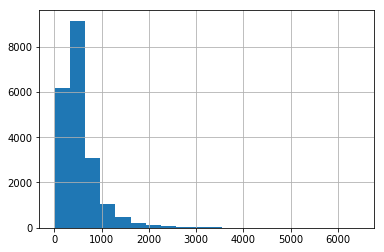

In [182]:
df.total_bedrooms.hist(bins=20)
plt.show()

In [183]:
# Dağılım normal olmadığı için tamamlama stratejisi olarak median seçsek daha iyi olur.

In [184]:
from sklearn.impute import SimpleImputer

In [185]:
imputer_total_bedrooms = SimpleImputer(strategy='median')

In [186]:
df['total_bedrooms'] = imputer_total_bedrooms.fit_transform(df['total_bedrooms'].values.reshape(-1,1))

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
ocean_proximity       20640 non-null object
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## 2.3. Veriyi X,y olarak bölme (nitelikler matrisi ve hedef değişken - dikey bölme) aka Numpy Dünyasına Giriş 

In [188]:
# Hedef değişken artık en sonda
X = df.iloc[:,:-1].values
X.shape

(20640, 9)

In [189]:
X[:10,:]

array([['NEAR BAY', -122.23, 37.88, 41.0, 880.0, 129.0, 322.0, 126.0,
        8.3252],
       ['NEAR BAY', -122.22, 37.86, 21.0, 7099.0, 1106.0, 2401.0, 1138.0,
        8.3014],
       ['NEAR BAY', -122.24, 37.85, 52.0, 1467.0, 190.0, 496.0, 177.0,
        7.2574],
       ['NEAR BAY', -122.25, 37.85, 52.0, 1274.0, 235.0, 558.0, 219.0,
        5.6431],
       ['NEAR BAY', -122.25, 37.85, 52.0, 1627.0, 280.0, 565.0, 259.0,
        3.8462],
       ['NEAR BAY', -122.25, 37.85, 52.0, 919.0, 213.0, 413.0, 193.0,
        4.0368],
       ['NEAR BAY', -122.25, 37.84, 52.0, 2535.0, 489.0, 1094.0, 514.0,
        3.6591],
       ['NEAR BAY', -122.25, 37.84, 52.0, 3104.0, 687.0, 1157.0, 647.0,
        3.12],
       ['NEAR BAY', -122.26, 37.84, 42.0, 2555.0, 665.0, 1206.0, 595.0,
        2.0804],
       ['NEAR BAY', -122.25, 37.84, 52.0, 3549.0, 707.0, 1551.0, 714.0,
        3.6912]], dtype=object)

In [190]:
y = df.iloc[:,-1].values
y.shape

(20640,)

In [191]:
y[:10]

array([452600., 358500., 352100., 341300., 342200., 269700., 299200.,
       241400., 226700., 261100.])

## 2.4. LabelEncoder ile kategorik nitelikleri kodlama

In [192]:
from sklearn.preprocessing import LabelEncoder
label_enc_ocean_proximity = LabelEncoder()

In [193]:
X[:,0].shape

(20640,)

In [194]:
X[:,0] = label_enc_ocean_proximity.fit_transform(X[:,0])
X.shape

(20640, 9)

In [195]:
X[:10,:]

array([[3, -122.23, 37.88, 41.0, 880.0, 129.0, 322.0, 126.0, 8.3252],
       [3, -122.22, 37.86, 21.0, 7099.0, 1106.0, 2401.0, 1138.0, 8.3014],
       [3, -122.24, 37.85, 52.0, 1467.0, 190.0, 496.0, 177.0, 7.2574],
       [3, -122.25, 37.85, 52.0, 1274.0, 235.0, 558.0, 219.0, 5.6431],
       [3, -122.25, 37.85, 52.0, 1627.0, 280.0, 565.0, 259.0, 3.8462],
       [3, -122.25, 37.85, 52.0, 919.0, 213.0, 413.0, 193.0, 4.0368],
       [3, -122.25, 37.84, 52.0, 2535.0, 489.0, 1094.0, 514.0, 3.6591],
       [3, -122.25, 37.84, 52.0, 3104.0, 687.0, 1157.0, 647.0, 3.12],
       [3, -122.26, 37.84, 42.0, 2555.0, 665.0, 1206.0, 595.0, 2.0804],
       [3, -122.25, 37.84, 52.0, 3549.0, 707.0, 1551.0, 714.0, 3.6912]],
      dtype=object)

## 2.5. OneHotEncoder ile kodlanan kategorik nitelikleri gölge değişkenler yapma

In [196]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(handle_unknown='ignore', categories='auto')

In [197]:
# Tek bir kategorik nitalik var. Acaba kaç farklı kategori var?
len(df.ocean_proximity.unique())

5

In [198]:
# Bir veya daha fazla sütunu ilgilendiren dönüşümleri kolay yapabilmek için kullanışlı bir sınıf (Estimator kökenli)
# Biz burada sadece OneHotEncoder için kullanacağız.
from sklearn.compose import ColumnTransformer

In [199]:
# ct bizim kendi verdiğiiz isimdir. 
# onehotencoder'ı yukarıda yarattık. [0] ise dönüşecek niteliklerin indeks değerleridir.

ct = ColumnTransformer(
    [('one_hot_encode_with_ct', onehotencoder, [0]),], 
    remainder='passthrough'
)

In [200]:
# ColumnTransformer nesnesi ile onehotencoder nesnesini eğitip gerekli dönüşümleri gerçekleştirip X'e tekrar atayalım.
# Burada X'in boyutu(shape) değişecektir.
X = ct.fit_transform(X)

In [201]:
X.shape

(20640, 13)

In [202]:
# Satır sayısının değişmediğine ancak sütun sayısının 9'dan 13'e çıktığına dikkat edelim.

In [203]:
X[:3,:]

array([[0.0, 0.0, 0.0, 1.0, 0.0, -122.23, 37.88, 41.0, 880.0, 129.0,
        322.0, 126.0, 8.3252],
       [0.0, 0.0, 0.0, 1.0, 0.0, -122.22, 37.86, 21.0, 7099.0, 1106.0,
        2401.0, 1138.0, 8.3014],
       [0.0, 0.0, 0.0, 1.0, 0.0, -122.24, 37.85, 52.0, 1467.0, 190.0,
        496.0, 177.0, 7.2574]], dtype=object)

## 2.6. Gölge Değişken Tuzağından (Dummy variable trap) Kaçınma 

In [204]:
# 4 tanesibiliniyorken 5. zaten bilinir. Dolayısıyla bir tanesini düşürelim, çoku bağlantı sorunu olmasın.
X = X[:,1:]
X.shape

(20640, 12)

## 2.7. Hedef değişken için Label Encoder

In [205]:
# Hedef niteliği zaten rakam olduğu için kodlamaya gerek yok. Ayrıca problem regresyon problemi

## 2.8. Polinom Regresyon için Ön Hazırlık

In [206]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)

In [207]:
X_poly.shape

(20640, 455)

## 2.9. Veri setini train-test olarak ayırma (yatay bölme)

In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y,
            test_size=0.25, random_state = 142)

In [209]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15480, 455)
(5160, 455)
(15480,)
(5160,)


# 3. Model Oluşturma ve Eğitim

## 3.1. Polinom Regresyon Nesnesi Oluşturma (Boş model yaratma)

In [210]:
from sklearn.linear_model import LinearRegression

In [211]:
regressor = LinearRegression()

## 3.2. Lineer modeli eğitme (modeli şekillendirme - veriye uydurma - eğitme)

In [212]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 3.3. Eğitilmiş modelle (makine) test seti kullanarak tahmin (prediction) 

In [213]:
y_pred = regressor.predict(X_test)

## 3.4. Tahmin sonuçlarını numpy.ndarray'den dataframe yapma (İncelemek daha Kolay)

In [214]:
predictions = pd.DataFrame(data=y_pred,    # values
                index=range(len(y_pred)),    # 1st column as index
                   columns=['y_pred'])  # 1st row as the column names

# Sadece y_pred'den oluşan df'e test(gerçek) y_test'i sütun olarak ekleme
predictions['y_test'] = y_test
predictions.head()

,y_pred,y_test
0,186101.508348,187800.0
1,264303.200618,176000.0
2,227152.585028,376800.0
3,245453.509214,293800.0
4,229785.650214,206300.0


## 3.5. Regression metrics

### 3.5.1. explained_variance

In [215]:
# The sklearn.metrics module implements several loss, score, and utility functions to measure 
# regression performance. Some of those have been enhanced to handle the multioutput case: 
# mean_squared_error, mean_absolute_error, explained_variance_score and r2_score.

In [216]:
from sklearn.metrics import explained_variance_score

In [217]:
explained_variance_score(y_true=y_test, y_pred=y_pred)

0.70329488291066

### 3.5.2. mean_absolute_error

In [218]:
from sklearn.metrics import mean_absolute_error

In [219]:
mean_absolute_error(y_true=y_test, y_pred=y_pred)

39747.378852329784

### 3.5.3. r2_score 

In [220]:
from sklearn.metrics import r2_score

In [221]:
r2_score(y_test, y_pred)

0.7032923718093183

# 4. Model Anlamlılığı

In [222]:
# Model anlamlılığına ve girdi değişkenlerin modele katkısına bakmak için scikit-learn'den farklı
# bir kütüphane kullanacağız. Çünkü bunu scikit learn'da yapamıyoruz. 

In [223]:
import statsmodels.api as sm

## 4.1. Sabit ekleme

In [224]:
# Sabit Ekleme (aslında sbitin önünde bir tane x üzeri 0 var. 
# Onu temsilen yeni bir sütunu 1'ler ile dolduruyoruz)

In [225]:
X.shape

(20640, 12)

In [226]:
X = sm.add_constant(X)
X.shape

(20640, 13)

In [227]:
X[:5,:]

array([[1.0, 0.0, 0.0, 1.0, 0.0, -122.23, 37.88, 41.0, 880.0, 129.0,
        322.0, 126.0, 8.3252],
       [1.0, 0.0, 0.0, 1.0, 0.0, -122.22, 37.86, 21.0, 7099.0, 1106.0,
        2401.0, 1138.0, 8.3014],
       [1.0, 0.0, 0.0, 1.0, 0.0, -122.24, 37.85, 52.0, 1467.0, 190.0,
        496.0, 177.0, 7.2574],
       [1.0, 0.0, 0.0, 1.0, 0.0, -122.25, 37.85, 52.0, 1274.0, 235.0,
        558.0, 219.0, 5.6431],
       [1.0, 0.0, 0.0, 1.0, 0.0, -122.25, 37.85, 52.0, 1627.0, 280.0,
        565.0, 259.0, 3.8462]], dtype=object)

In [228]:
import statsmodels.formula.api as sm

In [229]:
ols_obj = sm.OLS(endog=y, exog=X_poly)

In [230]:
ols_model = ols_obj.fit()

In [231]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     254.8
Date:                Sat, 25 May 2019   Prob (F-statistic):               0.00
Time:                        16:32:39   Log-Likelihood:            -2.5457e+05
No. Observations:               20640   AIC:                         5.097e+05
Df Residuals:                   20367   BIC:                         5.119e+05
Df Model:                         272                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4078.1183    941.227      4.333      0.000    2233.238    5922.999
x1          2.735e+04   2632.194     10.389      0.000    2.22e+04    3.25e+04
x2           263.4910     29.737      8.861      0.000     205.205     321.777
x3          -234.3738    278.927     -0.840      0.401    -781.094     312.346
x4         -4822.4097   1975.649     -2.441      0.015   -8694.842    -949.978
x5         -2.268e+05    7.3e+04     -3.108      0.002    -3.7e+05   -8.38e+04
x6          4.664e+04   2.34e+04      1.991      0.047     721.155    9.26e+04
x7          3.641e+04   1.82e+04      2.001      0.045     740.599    7.21e+04
x8          2.902e+04   1.51e+04      1.920      0.055    -611.336    5.87e+04
x9         -1.596e+05    8.9e+04     -1.794      0.073   -3.34e+05    1.48e+04
x10         4.293e+04   2.33e+04      1.840      0.066   -2812.259    8.87e+04
x11        -1.064e+05   1.16e+05     -0.914      0.361   -3.35e+05    1.22e+05
x12        -1.157e+04   5566.458     -2.079      0.038   -2.25e+04    -663.332
x13         2.773e+04   2632.373     10.533      0.000    2.26e+04    3.29e+04
x14           44.4007      7.901      5.620      0.000      28.915      59.886
x15           19.1446     11.908      1.608      0.108      -4.196      42.485
x16            5.9414      9.202      0.646      0.519     -12.095      23.978
x17        -2.706e+05   3.03e+04     -8.933      0.000    -3.3e+05   -2.11e+05
x18        -1.029e+06   1.02e+05    -10.062      0.000   -1.23e+06   -8.29e+05
x19         1.284e+04   1.24e+04      1.031      0.302   -1.16e+04    3.72e+04
x20          -68.4838    363.025     -0.189      0.850    -780.042     643.075
x21         2688.4473   2790.715      0.963      0.335   -2781.578    8158.473
x22        -2830.1731    501.675     -5.641      0.000   -3813.497   -1846.849
x23         6363.5380   3158.083      2.015      0.044     173.442    1.26e+04
x24        -5.878e+04   1.33e+05     -0.441      0.659    -3.2e+05    2.02e+05
x25            6.2176      2.100      2.960      0.003       2.101      10.334
x26           54.9922      8.279      6.642      0.000      38.764      71.220
x27          -10.6252      2.509     -4.235      0.000     -15.543      -5.707
x28           26.9463      6.272      4.296      0.000      14.653      39.240
x29           22.5625      6.098      3.700      0.000      10.610      34.515
x30           14.1562      4.446      3.184      0.001       5.441      22.871
x31          -10.2427      1.274     -8.042      0.000     -12.739      -7.746
x32           12.1252      1.315      9.221      0.000       9.548      14.703
x33            0.0255      0.014      1.866      0.062      -0.001       0.052
x34            0.0450      0.008      5.674      0.000       0.029       0.061
x35           -0.0415      0.009     -4.775      0.000      -0.059      -0.024
x3

In [232]:
# x3 çok az bir farkla p > 0.05 olduğu için onu modelde tutabiliriz.

# 5. Test seti dışındaki bir veri ile tahmin (prediction)

In [ ]:
# Tahmin edilmek istenen yeni rakamlar modelin geçtiği tüm hazırlık aşamasından geçmelidir. 
# Modele vereceğimiz verinin şekli (shape) model eğitirken kullandğımız ile aynı olmalıdır.
# Yukarıda kullandığımız test_df'i biz zaten aynı süreçten geçirmiştik. Ancak gerçek dünyada
# tahmin edilmek istenen veriler ön işlemeye muhtaçtır.